Exploring anatomic MRI DATA (anat)

In [2]:
import os
data_path = "ds005713-download/"
print(os.listdir(data_path))  # Explore downloaded dataset

['sub-13', 'sub-14', 'sub-026', 'sub-22', 'sub-010', 'sub-25', 'sub-017', 'sub-028', 'sub-035fu', 'sub-071fu', 'sub-088', 'sub-043', 'sub-044', 'sub-010fu', 'sub-086', 'sub-072', 'sub-40', 'sub-47', 'sub-081', 'sub-016', 'sub-24', 'sub-029', 'sub-23', 'sub-15', 'sub-020', 'sub-12', 'sub-080', 'sub-46', 'sub-074', 'sub-41', 'sub-073', 'sub-087', 'sub-48', 'sub-045', 'sub-089', 'sub-050fu', 'sub-042', 'sub-130', 'sub-137', 'sub-108', 'sub-101', '.DS_Store', 'sub-106', 'sub-082fu', 'sub-139', 'sub-104fu', 'sub-107', 'sub-138', 'sub-100', 'sub-100fu', 'sub-136', 'sub-109', 'sub-025fu', 'sub-072fu', 'sub-095fu', 'sub-113', 'sub-057fu', 'CHANGES', 'sub-114', 'sub-122', 'sub-125', 'sub-053fu', 'sub-117fu', 'sub-017fu', 'sub-124', 'sub-123', 'sub-115', 'sub-112', 'sub-094', 'sub-060', 'sub-067', 'sub-049fu', 'sub-058', 'sub-051', 'sub-028fu', 'sub-056', 'sub-043fu', 'sub-069', 'sub-30', 'sub-08', 'sub-37', 'sub-01', 'sub-39', 'sub-06', 'sub-057', 'sub-009fu', 'sub-068', 'sub-050', 'sub-085fu',

In [1]:
import nibabel as nib
# Path to the NIfTI file
dataset_path = "ds005713-download/"
nifti_file = os.path.join(dataset_path, "sub-01", "anat", "sub-01_run-01_T1w.nii.gz")

# Load the NIfTI file
img = nib.load(nifti_file)

# Get the image data as a NumPy array
data = img.get_fdata()

# Inspect the data
# Shape of data tells you how many slices each axis has 0 - 1 - 2
print(f"Shape of the data: {data.shape}")
print(f"Data type: {data.dtype}")

NameError: name 'os' is not defined

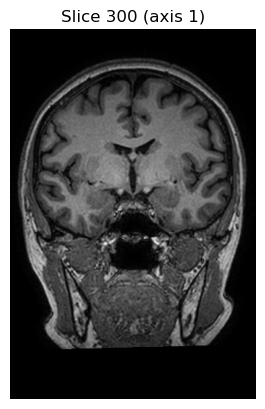

In [4]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# Select a slice index and axis
slice_index = 300  # You can dynamically adjust this later
axis = 1          # Axis: 0 (sagittal), 1 (coronal), 2 (axial)

# Dynamically extract the slice based on the axis
if axis == 0:
    slice_data = data[slice_index, :, :]  # Sagittal plane
elif axis == 1:
    slice_data = data[:, slice_index, :]  # Coronal plane
elif axis == 2:
    slice_data = data[:, :, slice_index]  # Axial plane
else:
    raise ValueError("Invalid axis. Axis must be 0, 1, or 2.")

# Plot the slice
plt.imshow(slice_data.T, cmap="gray", origin="lower")
plt.title(f"Slice {slice_index} (axis {axis})")
plt.axis("off")
plt.show()


[get_dataset_dir] Dataset found in /Users/egzonamorina/nilearn_data/icbm152_2009
Path to MNI template: /Users/egzonamorina/nilearn_data/icbm152_2009/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a.nii.gz
[get_dataset_dir] Dataset found in /Users/egzonamorina/nilearn_data/fsl


/var/folders/5r/q4h3z5wj6s5bx_1bft06m7tm0000gn/T/ipykernel_1117/3957418943.py:46: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_atlas = resample_to_img(atlas_filename, aligned_anat_img, interpolation='nearest')
/Users/egzonamorina/opt/anaconda3/envs/cirq-env/lib/python3.9/site-packages/nilearn/image/resampling.py:807: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


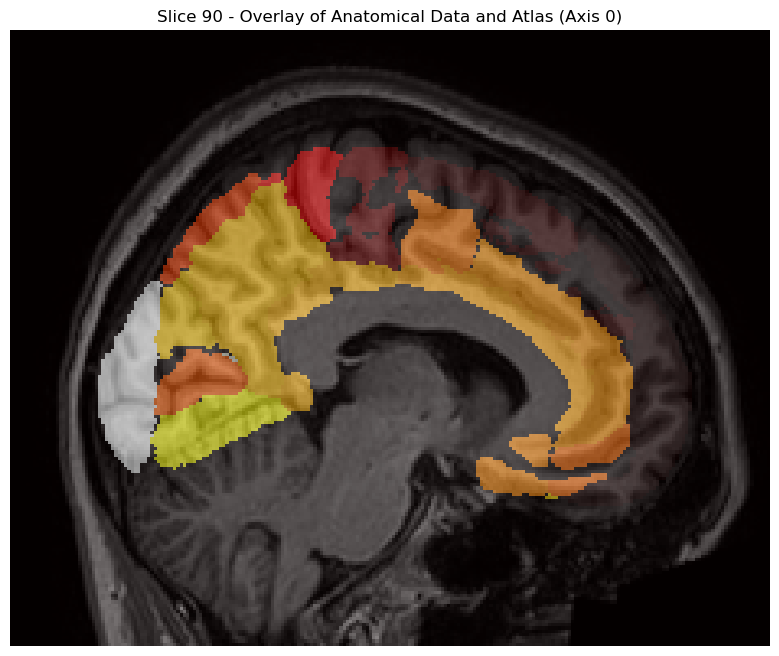

Regions in slice 90 (Axis 0):
 - Region 1.0: Frontal Pole
 - Region 3.0: Superior Frontal Gyrus
 - Region 7.0: Precentral Gyrus
 - Region 17.0: Postcentral Gyrus
 - Region 18.0: Superior Parietal Lobule
 - Region 22.0: Lateral Occipital Cortex, superior division
 - Region 24.0: Intracalcarine Cortex
 - Region 25.0: Frontal Medial Cortex
 - Region 26.0: Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)
 - Region 27.0: Subcallosal Cortex
 - Region 28.0: Paracingulate Gyrus
 - Region 29.0: Cingulate Gyrus, anterior division
 - Region 30.0: Cingulate Gyrus, posterior division
 - Region 31.0: Precuneous Cortex
 - Region 32.0: Cuneal Cortex
 - Region 33.0: Frontal Orbital Cortex
 - Region 36.0: Lingual Gyrus
 - Region 47.0: Supracalcarine Cortex
 - Region 48.0: Occipital Pole


In [5]:
from nilearn.datasets import fetch_icbm152_2009, fetch_atlas_harvard_oxford
import ants
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from nilearn.image import resample_to_img

# Fetch and print MNI template
template = fetch_icbm152_2009()['t1']
print(f"Path to MNI template: {template}")

# Paths
dataset_path = "ds005713-download/"
subject_id = "sub-01"
anat_path = os.path.join(dataset_path, subject_id, "anat", "sub-01_run-01_T1w.nii.gz")

# Ensure output directory exists
output_dir = os.path.join(dataset_path, subject_id, "anat")
os.makedirs(output_dir, exist_ok=True)

# Load your anatomical image
anat_img = ants.image_read(anat_path)

# Load the MNI template
mni_img = ants.image_read(template)

# Register anatomical to MNI template
reg = ants.registration(fixed=mni_img, moving=anat_img, type_of_transform='Affine')

# Save the aligned image in the subject's directory
aligned_anat = reg['warpedmovout']
aligned_anat_path = os.path.join(output_dir, "sub-01_run-01_T1w_MNI.nii.gz")
ants.image_write(aligned_anat, aligned_anat_path)

# Load the aligned anatomical data
aligned_anat_img = nib.load(aligned_anat_path)
aligned_anat_data = aligned_anat_img.get_fdata()

# Fetch the Harvard-Oxford atlas (cortical areas, thresholded at 25%)
atlas = fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
atlas_filename = atlas['maps']
atlas_labels = atlas['labels']

# Resample atlas to match the anatomical image
resampled_atlas = resample_to_img(atlas_filename, aligned_anat_img, interpolation='nearest')
resampled_atlas_data = resampled_atlas.get_fdata()

# Function to handle slicing along different axes and extract region names
def plot_slice_with_labels(data, atlas, labels, axis=0, slice_index=90):
    if axis == 0:  # Sagittal
        anat_slice = data[slice_index, :, :]
        atlas_slice = atlas[slice_index, :, :]
    elif axis == 1:  # Coronal
        anat_slice = data[:, slice_index, :]
        atlas_slice = atlas[:, slice_index, :]
    elif axis == 2:  # Axial
        anat_slice = data[:, :, slice_index]
        atlas_slice = atlas[:, :, slice_index]
    else:
        raise ValueError("Invalid axis. Must be 0 (sagittal), 1 (coronal), or 2 (axial).")
    
    # Plot the anatomical image with atlas overlay
    plt.figure(figsize=(10, 8))
    plt.imshow(anat_slice.T, cmap="gray", origin="lower")
    plt.imshow(atlas_slice.T, cmap="hot", alpha=0.5, origin="lower")  # Overlay atlas
    plt.title(f"Slice {slice_index} - Overlay of Anatomical Data and Atlas (Axis {axis})")
    plt.axis("off")
    plt.show()
    
    # Extract and print atlas labels for this slice
    unique_labels = np.unique(atlas_slice)
    print(f"Regions in slice {slice_index} (Axis {axis}):")
    for label in unique_labels:
        if label > 0:  # Ignore the background (label 0)
            region_name = labels[int(label)]
            print(f" - Region {label}: {region_name}")

# Test with axis 2 (Axial), slice index 90
plot_slice_with_labels(aligned_anat_data, resampled_atlas_data, atlas_labels, axis=0, slice_index=90)


In [6]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def explore_slices(slice_index):
    if axis == 0:
        slice_data = data[slice_index, :, :]
    elif axis == 1:
        slice_data = data[:, slice_index, :]
    elif axis == 2:
        slice_data = data[:, :, slice_index]
    else:
        raise ValueError("Invalid axis")

    plt.imshow(slice_data.T, cmap="gray", origin="lower")
    plt.title(f"Slice {slice_index} (axis {axis})")
    plt.axis("off")
    plt.show()

# Interactive slider
interact(explore_slices, slice_index=(0, data.shape[axis]-1))


interactive(children=(IntSlider(value=255, description='slice_index', max=511), Output()), _dom_classes=('widg…

<function __main__.explore_slices(slice_index)>